In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Intervalos de confianza para la media (población normal y desviación estándar poblacional $\sigma$ conocida).

Para una muestra con N elementos seleccionada al azar de la población, cuya media muestral sea $\bar{x}$, el intervalo de confianza para la media poblacional se calcula como:
$\bar{x}\pm z^{*}\frac{\sigma}{\sqrt{N}}$.

El valor $z^*$ es un valor constante que depende del nivel de confianza que queremos. Algunos valores típicos son:

|Intervalo de confianza| z^*|
|---|---|
|95% |1.96 |
|90% |1.645 |
|99% |2.576 |

$z^*$ corresponde al quantile 95, 90 y 99 respectivamente.






In [2]:
#computing z*
import scipy.stats as st
confidence = 0.97
alfa_significancia = 1-confidence
alfa_significancia_medios = alfa_significancia/2.
print(-st.norm.ppf(alfa_significancia_medios))



2.17009037758456


El valor de $z^*$ se calcula en base a la distribución normal estándar

In [3]:
import math
import scipy.stats as stats
plt.style.use('ggplot')

def plot_area_confint_z(confidence_level=0.95, mu=0,sigma=1):

  alfa = round((1-confidence_level),2)
  alfa_medios = alfa/2.
  z=-st.norm.ppf(alfa_medios)
  x=np.linspace(mu-3*sigma, mu+3*sigma,1000)
  iq=stats.norm(mu,sigma)

  fig = plt.figure(figsize=(6, 6))
  plt.plot(x,iq.pdf(x),'b')
  px=np.arange(z,3,0.01)
  px1=np.arange(-3,-z,0.01)
  px2=np.arange(-z,z,0.01)

  plt.fill_between(px, iq.pdf(px),alpha=0.7,color='red',interpolate=True )
  plt.fill_between(px1, iq.pdf(px1),alpha=0.7,color='red',interpolate=True )
  plt.fill_between(px2, iq.pdf(px2),alpha=0.7,color='green',interpolate=True)
  plt.axvline(x=z)
  plt.text(z,0.35,'z=%s'%(z),fontsize='large')
  plt.text(-1,0.20,r'$(1-\alpha)=%s$'%(confidence_level),fontsize='x-large')
  plt.text(-2.5,0.007,r'$\alpha/2$',fontsize='x-large')
  plt.text(2.1,0.007,r'$\alpha/2$',fontsize='x-large')
  plt.text(-2.9,0.38,'significancia',fontsize='x-large')
  plt.text(-2.4,0.35,r'$\alpha=%s$'%(alfa),fontsize='x-large')
  plt.text(-3,0.05,r'$\alpha/2=%s$'%(alfa_medios),fontsize='large',color='red')
  plt.text(2.1,0.05,r'$\alpha/2=%s$'%(alfa_medios),fontsize='large',color='red')
  plt.show()


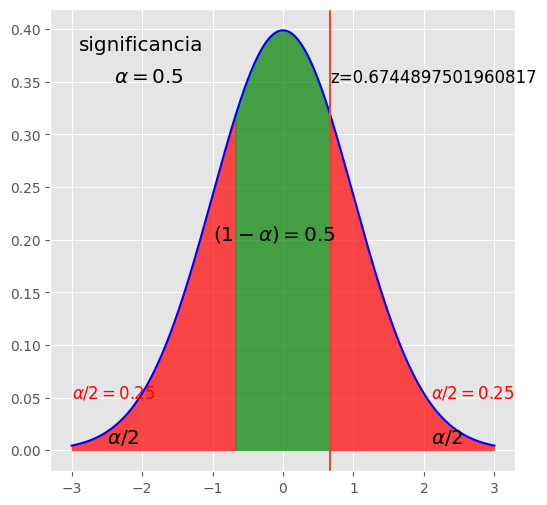

In [4]:
plot_area_confint_z(0.50)

La parte de código que sigue la copié de:
https://towardsdatascience.com/confidence-intervals-with-python-bfa28ebb81c

1906/2000=0.95


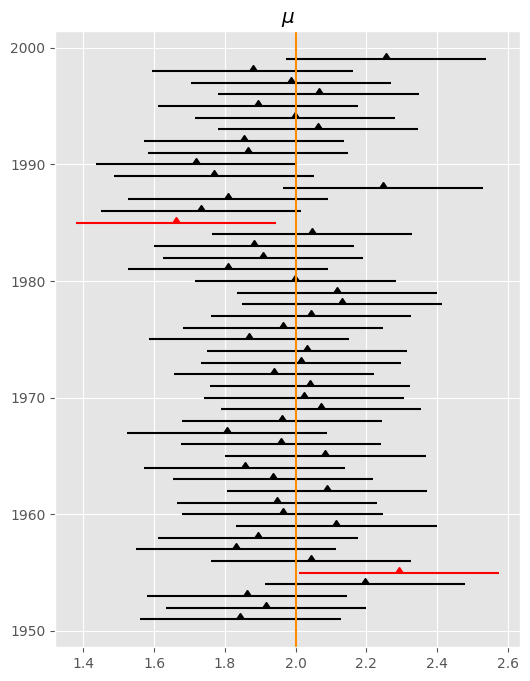

In [5]:
from scipy.stats import norm
def confidence_interval_mean(mu, sigma, n, number_trials, N, ci=0.95, sample='random'):
    x_ = norm.rvs(loc=mu, scale=sigma, size=N)
    x_hat_list = []
    SE_hat_x_list = []

    if sample!='random':
        # Inducing bias on the sampling
        x_.sort()
        x_ = x_[:-int(0.2*N)]
        np.random.shuffle(x_)

    for i in range(number_trials):
        s_ = np.random.choice(x_, n, replace=False)
        x_hat = np.mean(s_)
        x_hat_list.append(x_hat)
        SE_hat_x_list.append(norm.ppf(ci+(1-ci)/2)*sigma/np.sqrt(n))

    j=0
    _, ax = plt.subplots(1, 1, figsize=(6, 8))
    for i in range(len(x_hat_list)):
        if (mu>x_hat_list[i]-SE_hat_x_list[i]) & (mu<x_hat_list[i]+SE_hat_x_list[i]):
            # interval contains p
            if i > len(x_hat_list)-50:
                ax.errorbar(x_hat_list[i], np.arange(len(x_hat_list))[i],lolims=True, xerr=SE_hat_x_list[i], yerr=0.0, linestyle='', c='black')
            j +=1
        else:
            # interval does not contain p
            if i > len(x_hat_list)-50:
                ax.errorbar(x_hat_list[i], np.arange(len(x_hat_list))[i],lolims=True, xerr=SE_hat_x_list[i], yerr=0.0, linestyle='', c='red')
    ax.axvline(mu, color='darkorange')
    #plt.xlim(0,1)
    plt.title(r'$\mu$')
    print(f'{j}/{number_trials}={np.round(j/number_trials,2)}')

confidence_interval_mean(2, 0.5, 12, 2000, 1000)

Los intervalos coloreados en negro corresponden a estimaciones correctas, porque capturan el valor verdadero de $\mu$, los intervalos coloreados en rojo corresponden a estimaciones no correctas, porque no capturan el valor de $\mu$ verdadero. Podemos comprobar que el 95% de las veces la estimación es correcta.

### Ejemplo 1: intervalo de confianza (población normal, $\sigma$ conocida)
Se selecciona una muestra aleatoria de N=30 pesos de paquetes enviados en Amazon cierto día. Se sabe que la población es normal con $\sigma$=3.45 kg. Estime el peso promedio para todos los paquetes enviados ese día con un intervalo de confianza de 95% y 99%.

In [11]:
#La muestra es la siguiente:
muestra = np.array([ 1.88689243,  8.75090936,  3.8957522 ,  3.26186619,  4.61731687,
        8.16135376,  5.65658302,  7.71257492,  7.82408157,  9.7366273 ,
        8.10762013,  7.82453888, 10.7518267 ,  2.77780904, 11.21601643,
       11.96064261,  6.14154209,  4.99190303,  3.93209336,  6.53560598,
        7.98872059,  9.64968492,  7.27697272, 12.27795519,  3.81474239,
        8.99003868,  2.66776263,  4.43998498,  4.012761  , 10.44755954])

In [12]:
def calculate_z(confidence):
  import scipy.stats as st
  alfa = 1-confidence
  alfa_medios = alfa/2.
  return -st.norm.ppf(alfa_medios)

In [13]:
sigma = 3.45 #desviación estándar poblacional
N = muestra.size
#Para estimar el intervalo de condfianza, calculamos la media muestral:
media_muestra = muestra.mean()
print("La media de la muestra es:",media_muestra)
#Tenemos que calcular el error estándar sigma/raíz(N)
error_est = sigma/math.sqrt(N)
print('El error estándar es:',error_est)

# Calculamos el valor z* para un intervalo de confianza de 95%
z_star = calculate_z(0.95)

#Calculamos el intervalo de confianza "a mano"
interval_95 = np.array([media_muestra-z_star*error_est,media_muestra+z_star*error_est])
print('El intervalo de confianza de 95% es:',interval_95)

#Usando stats.norm

interval2_95 = st.norm.interval(0.95, loc=np.mean(muestra), scale=error_est)  #scale corresponde al error estándar, no a sigma de la población
print('El error estándar calculado con st.norm es:',interval2_95)



La media de la muestra es: 6.910324617
El error estándar es: 0.6298809411309411
El intervalo de confianza de 95% es: [5.67578066 8.14486858]
El error estándar calculado con st.norm es: (5.675780657835161, 8.144868576164837)


In [14]:
print('El intervalo de confianza de 90% es:',st.norm.interval(0.90, loc=np.mean(muestra), scale=error_est))

El intervalo de confianza de 90% es: (5.8742626664331645, 7.946386567566835)


### ¿Y si no se conoce la desviación estándar poblacional $\sigma$?
La mayoría de las veces no se conoce $\sigma$ y lo más lógico sería estimar el intervalo de confianza como:
$\bar{x}\pm z^{*}\frac{s}{\sqrt{N}}$
donde s es la desviación estándar muestral.
Vamos a simular los intervalos de confianza obtenidos para diferentes muestras aleatorias, estimados usando la fórmula escrita arriba.

La parte de código que sigue la copié de:
https://towardsdatascience.com/confidence-intervals-with-python-bfa28ebb81c

1811/2000=0.91


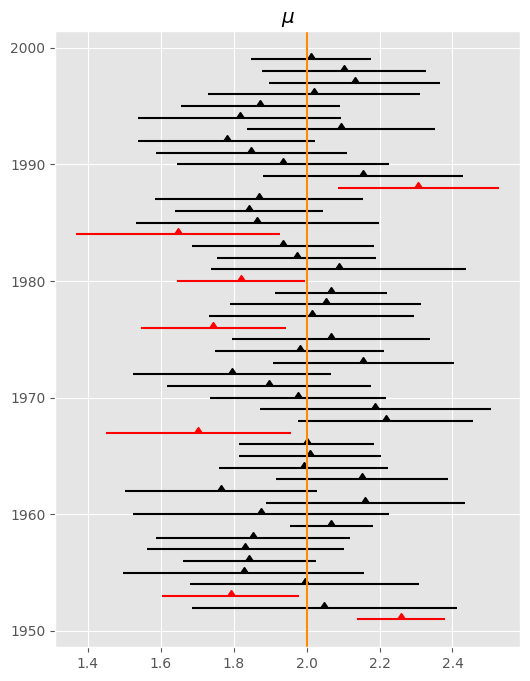

In [6]:
from scipy.stats import norm

def confidence_interval_mean(mu, sigma, n, number_trials, N, ci=0.95, sample='random'):
    x_ = norm.rvs(loc=mu, scale=sigma, size=N)
    x_hat_list = []
    SE_hat_x_list = []

    if sample!='random':
        # Inducing bias on the sampling
        x_.sort()
        x_ = x_[:-int(0.2*N)]
        np.random.shuffle(x_)

    for i in range(number_trials):
        s_ = np.random.choice(x_, n, replace=False)
        x_hat = np.mean(s_)
        x_hat_list.append(x_hat)
        SE_hat_x_list.append(norm.ppf(ci+(1-ci)/2)*np.std(s_)/np.sqrt(n))

    j=0
    _, ax = plt.subplots(1, 1, figsize=(6, 8))
    for i in range(len(x_hat_list)):
        if (mu>x_hat_list[i]-SE_hat_x_list[i]) & (mu<x_hat_list[i]+SE_hat_x_list[i]):
            # interval contains p
            if i > len(x_hat_list)-50:
                ax.errorbar(x_hat_list[i], np.arange(len(x_hat_list))[i],lolims=True, xerr=SE_hat_x_list[i], yerr=0.0, linestyle='', c='black')
            j +=1
        else:
            # interval does not contain p
            if i > len(x_hat_list)-50:
                ax.errorbar(x_hat_list[i], np.arange(len(x_hat_list))[i],lolims=True, xerr=SE_hat_x_list[i], yerr=0.0, linestyle='', c='red')
    ax.axvline(mu, color='darkorange')
    #plt.xlim(0,1)
    plt.title(r'$\mu$')
    print(f'{j}/{number_trials}={np.round(j/number_trials,2)}')
confidence_interval_mean(2, 0.5, 12, 2000, 1000)

Podemos observar que el porcentaje de estimaciones correctas no corresponde al 95%. Esto se debe al hecho que si las muestras son pequeñas, la distribución muestral de $\bar{x}$ (con $\sigma$ desconocida) no es normal y el valor $z^*$ usado para estimar el intervalo lleva a un resultado incorrecto.

### Población normal, $\sigma$ descocida y muestras pequeñas (N < 100)
La distribución muestral de la media sigue la distribución t-Student (https://economipedia.com/definiciones/distribucion-t-de-student.html) (https://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student), cuando no se conoce $\sigma$.
La distribución t-Student se parece a una normal, pero tiene las colas más "pesadas" (más altas respecto a la normal). La forma de la t-Student depende del tamaño de la muestra. Para muestras con N < 30 la diferencia entre la t-Student y la normal es grande, para muestras con 30 < N < 100 la t-Student se acerca cada vez más al aumentar de N a la normal y para N > 100 las dos distribuciones son casi indistinguibles.
Hay una t-Student diferente para cada tamaño muestral (entonces habrá intervalos de confianza diferentes para cada N). El parámetro de la t-Student que determina su forma es el "número de grados de libertad", que corresponde a N-1, si la muestra contiene N elementos.
El intervalo de confianza se calcula como:
$\bar{x}\pm t^*\frac{s}{\sqrt{N}}$
donde $s$ es la desviación estándar muestral.

In [7]:
#computing t*
import scipy.stats as st
confidence = 0.95
grados_libertad = 1000
alfa_significancia = 1-confidence
alfa_significancia_medios = alfa_significancia/2.
print(-st.t(grados_libertad).ppf(alfa_significancia_medios))


1.9623390808264074


In [8]:
import math
import scipy.stats as stats
plt.style.use('ggplot')

def plot_area_confint(confidence_level=0.95, N=10):

  alfa = round((1-confidence_level),2)
  alfa_medios = alfa/2.
  iq = stats.t(N-1)
  t=-iq.ppf(alfa_medios)
  x=np.linspace(-5, 5,1000)

  fig = plt.figure(figsize=(6, 6))
  plt.plot(x,iq.pdf(x),'b')
  px=np.arange(t,5,0.01)
  px1=np.arange(-5,-t,0.01)
  px2=np.arange(-t,t,0.01)

  plt.fill_between(px, iq.pdf(px),alpha=0.7,color='red',interpolate=True )
  plt.fill_between(px1, iq.pdf(px1),alpha=0.7,color='red',interpolate=True )
  plt.fill_between(px2, iq.pdf(px2),alpha=0.7,color='green',interpolate=True)
  plt.axvline(x=t)
  plt.text(t,0.35,'t=%s'%(t),fontsize='large')
  plt.text(-1,0.20,r'$(1-\alpha)=%s$'%(confidence_level),fontsize='x-large')
  plt.text(-3,0.007,r'$\alpha/2$',fontsize='x-large')
  plt.text(2.1,0.007,r'$\alpha/2$',fontsize='x-large')
  plt.text(-4,0.38,'significancia',fontsize='x-large')
  plt.text(-4,0.35,r'$\alpha=%s$'%(alfa),fontsize='x-large')
  plt.text(-4,0.05,r'$\alpha/2=%s$'%(alfa_medios),fontsize='large',color='red')
  plt.text(2.1,0.05,r'$\alpha/2=%s$'%(alfa_medios),fontsize='large',color='red')
  plt.show()


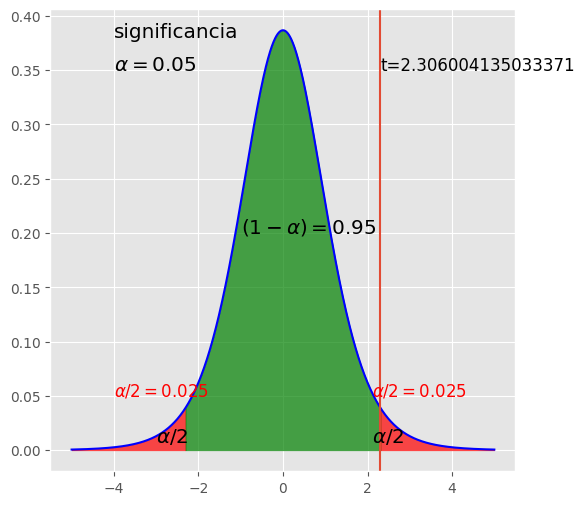

In [9]:
plot_area_confint(0.95,9)

La parte de código que sigue la copié de:
https://towardsdatascience.com/confidence-intervals-with-python-bfa28ebb81c

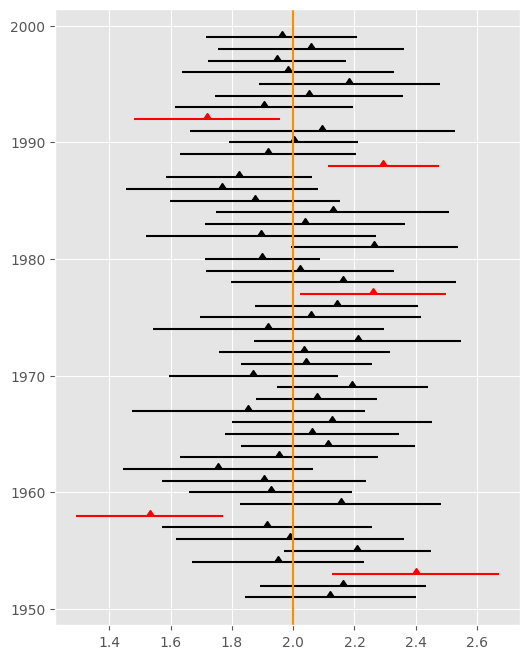

1895/2000=0.95


In [10]:
from scipy.stats import t

def confidence_interval_mean_t(μ, σ, n, number_trials, N, ci=0.95, sample='random'):
    x_ = norm.rvs(loc=μ, scale=σ, size=N)
    x_hat_list = []
    SE_hat_x_list = []

    if sample!='random':
        # Inducing bias on the sampling
        x_.sort()
        x_ = x_[:-int(0.2*N)]
        np.random.shuffle(x_)

    for i in range(number_trials):
        s_ = np.random.choice(x_, n, replace=False)
        x_hat = np.mean(s_)
        x_hat_list.append(x_hat)
        SE_hat_x_list.append(t.ppf(ci+(1-ci)/2, df=n-1)*np.std(s_)/np.sqrt(n))

    j=0
    _, ax = plt.subplots(1, 1, figsize=(6, 8))
    for i in range(len(x_hat_list)):
        if (μ>x_hat_list[i]-SE_hat_x_list[i]) & (μ<x_hat_list[i]+SE_hat_x_list[i]):
            # interval contains p
            if i > len(x_hat_list)-50:
                ax.errorbar(x_hat_list[i], np.arange(len(x_hat_list))[i],lolims=True, xerr=SE_hat_x_list[i], yerr=0.0, linestyle='', c='black')
            j +=1
        else:
            # interval does not contain p
            if i > len(x_hat_list)-50:
                ax.errorbar(x_hat_list[i], np.arange(len(x_hat_list))[i],lolims=True, xerr=SE_hat_x_list[i], yerr=0.0, linestyle='', c='red')
    ax.axvline(μ, color='darkorange')
    #plt.xlim(0,1)
    plt.show()
    print(f'{j}/{number_trials}={np.round(j/number_trials,2)}')
confidence_interval_mean_t(2, 0.5, 12, 2000, 1000)

### Ejemplo 2: población normal, $\sigma$ desconocida, muestra pequeña
Se quiere estimar el precio promedio de las compras en Amazon cierto día en cierta ciudad. Se selecciona una muestra aleatoria de N = 20 compras. Estime el precio promedio de las compras para toda la ciudad en ese día con un intervalo de confianza de 90%, 95%, 99%. Interprete el resultado.

In [15]:
def calculate_t(confidence, N):
  import scipy.stats as st
  grados_libertad = N-1
  alfa = 1-confidence
  alfa_medios = alfa/2.
  return -st.t(grados_libertad).ppf(alfa_medios)

In [16]:
muestra_2 = np.array([40.32334114, 49.66441589, 48.81963426, 31.93328783, 42.84719922,
       23.73574529, 34.22486951, 42.27710215, 22.8967719 , 38.65320427,
       36.64494369, 31.0026404 , 22.50213678, 30.62881846, 24.7274558 ,
       24.31204024, 23.97677856, 44.409053  , 53.53516598, 27.39778207])

N = muestra_2.size
#Calculamos la media muestral
media_muestra_2 = muestra_2.mean()
print('La media muestral es:',media_muestra_2)
#Calculamos el error estándar como s/raíz(N)
err_est_2 = muestra_2.std(ddof=1)/math.sqrt(N)   #como default la función nmupy.std divide entre N-ddof, el valor de default de ddof es 0

#Calculamos t_star
t_star = calculate_t(0.90,N)
#Intervalo de confianza calculado "a mano"
intervalo_90 = np.array([media_muestra_2-t_star*err_est_2,media_muestra_2+t_star*err_est_2])
print("El intervalo de confianza de 90% es:",intervalo_90)

#Intervalo de confianza con stats.t
intervalo_90_2 =st.t.interval(0.90, N-1, loc=np.mean(muestra_2), scale=err_est_2)
print('El intervalo calculado con stats.t es:', intervalo_90_2)

# Intervalo de confianza con statsmodels.stats.api
#(no se debe calcular la media y error estándar,
# en lugar que el nivel de confianza se usa la significancia=1-confianza)
import statsmodels.stats.api as sms
print(sms.DescrStatsW(muestra_2).tconfint_mean(0.10))

La media muestral es: 34.72561932199999
El intervalo de confianza de 90% es: [30.89057481 38.56066384]
El intervalo calculado con stats.t es: (30.89057480579862, 38.560663838201364)
(30.890574805798625, 38.560663838201364)


In [17]:
intervalo_99_2 =st.t.interval(0.99, N-1, loc=np.mean(muestra_2), scale=err_est_2)
print('El intervalo calculado con stats.t 99% es:', intervalo_99_2)


El intervalo calculado con stats.t 99% es: (28.380351046150793, 41.07088759784919)


### Interpretación:
El precio promedio es un valor entre 30.89  y 38.56. El 90% de confianza significa que si calculáramos 100 intervalos de confianza para 100 muestras diferentes, 90 intervalos capturarían el valor correcto del precio promedio (estimación correcta) y 10 intervalos corrisponderían a una estimación incorrecta.

In [18]:
#Intervalo de 95%
print('Intervalo 95%',st.t.interval(0.95, N-1, loc=np.mean(muestra_2), scale=err_est_2))
#Intervalo de 99%
print('Intervalo 99%',st.t.interval(0.99, N-1, loc=np.mean(muestra_2), scale=err_est_2))

Intervalo 95% (30.08350023857713, 39.367738405422855)
Intervalo 99% (28.380351046150793, 41.07088759784919)


### Ejemplo 2: (población normal), $\sigma$ desconocida, muestra grande
Se quiere estimar el precio promedio de las compras en Amazon cierto día en cierta ciudad. Se selecciona una muestra aleatoria de N = 100 compras. Estime el precio promedio de las compras para toda la ciudad en ese día con un intervalo de confianza de 90%, 95%, 99%. Interprete el resultado.

Dado que la muestra es grande, ya no importa saber si la población es normal o no.

In [19]:
muestra_3 = np.array([27.26272917, 31.98167455, 35.52684921, 29.53317944, 31.45319859,
       46.57130886, 38.26934975, 28.9513777 , 40.69398721, 35.91366072,
       53.25875023, 38.81095741, 27.03539903, 41.99718258, 29.11313369,
       18.43932922, 37.87929542, 37.05138156, 40.20473302, 31.02514158,
       21.44007419, 41.15669564, 20.49074821, 35.60144493, 47.74951617,
       39.51184985, 30.14567964, 30.95467686, 46.54852759, 55.65563952,
       38.35022957, 16.21193244, 35.0598382 , 36.67702286, 22.174375  ,
       70.63741886, 28.25864652, 12.53352998, 47.15008086, 24.83249936,
       53.11135767, 46.66221237, 20.09957227, 41.06399801, 34.79613291,
       41.14442125, 29.62838315, 51.78083081, 45.38438436, 31.29256236,
       45.44395981, 48.40875854, 22.13248639, 32.2531567 , 36.68776619,
       42.98870278, 22.20723417, 17.6179057 , 33.75596085, 32.10847561,
       56.70053545, 50.61051888, 31.10588545, 51.22494847, 44.19091662,
       33.54450576, 42.09497482, 50.64011271, 56.88280928, 25.76684328,
       50.29882071, 23.41118727, 17.54057527, 36.41289878, 35.6974992 ,
       55.73192381, 31.14374955, 34.31746141, 42.34516069, 32.26277002,
       37.61462092, 44.29499543, 31.97944777, 31.63973858, 25.07469343,
       47.06678994, 36.40024602, 35.02819155, 39.74394966, 30.53146923,
       65.46590579, 19.94437839,  8.08652538, 25.55013092, 32.61328018,
       31.13478226, 41.09142864, 31.42481726, 50.10438913, 40.96835226])

err_est_3 = muestra_3.std(ddof=1)/math.sqrt(len(muestra_3))
#Intervalo de 90%
print('Intervalo 90% - t-Student',st.t.interval(0.90, N-1, loc=np.mean(muestra_3), scale=err_est_3))
print('Intervalo 90% - normal',st.norm.interval(0.90, loc=np.mean(muestra_3), scale=err_est_3))

#Intervalo de 95%
print('Intervalo 95% - t-Student',st.t.interval(0.95, N-1, loc=np.mean(muestra_3), scale=err_est_3))
print('Intervalo 95% - normal',st.norm.interval(0.95, loc=np.mean(muestra_3), scale=err_est_3))
#Intervalo de 99%
print('Intervalo 99%',st.t.interval(0.99, N-1, loc=np.mean(muestra_3), scale=err_est_3))
print('Intervalo 99% - normal',st.norm.interval(0.99,  loc=np.mean(muestra_3), scale=err_est_3))


Intervalo 90% - t-Student (34.4174538685168, 38.34981687668319)
Intervalo 90% - normal (34.51328697790922, 38.25398376729078)
Intervalo 95% - t-Student (34.00367638046338, 38.76359436473661)
Intervalo 95% - normal (34.15497779962777, 38.61229294557222)
Intervalo 99% (33.13049213796082, 39.63677860723917)
Intervalo 99% - normal (33.454682836063874, 39.31258790913612)


### Distribución muestral de la diferencia de dos medias

Dos poblaciones normales, con medias $\mu_1,\mu_2$ (desconocidas) y desviaciones estándares $\sigma_1, \sigma_2$ conocidas. Se quiere estimar la diferencia entre las medias $\mu_1-\mu_2$ a partir de la diferencia $\bar{x}_1-\bar{x}_2$ de los promedios muestrales $\bar{x}_1$ y $\bar{x}_2$ calculados para dos muestras seleccionadas de la población 1 y de la 2 respectivamente, con número de elementos $N_1$ y $N_2$.

La distribución muestral de $\bar{x}_1-\bar{x}_2$ es una normal con media igual a $\mu_1-\mu_2$ y desviación estándar dada por:

$\sqrt{\frac{\sigma_1^2}{N_1}+\frac{\sigma_2^2}{N_2}}$

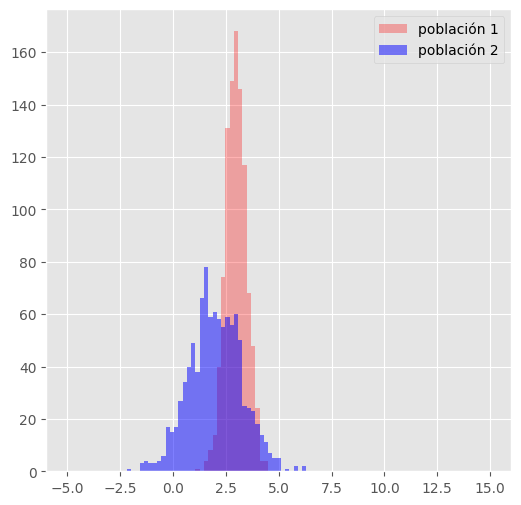

In [20]:
# Simulamos dos poblaciones normales p_1 y p_2, con medias mu_1 = 3.0 y mu_2 = 2.0.
# Las desviaciones estándares son sigma_1 = 0.5 y sigma_2 = 1.2.
mu_1 = 3.0
mu_2 = 2.0
sigma_1 = 0.5
sigma_2 = 1.2
p_1 = np.random.normal(mu_1,sigma_1,1000)
p_2 = np.random.normal(mu_2,sigma_2,1000)


bins = np.linspace(-5, 15, 100)
fig = plt.figure(figsize=(6, 6))
plt.hist(p_1, bins, alpha=0.3, label='población 1', color='red')
plt.hist(p_2, bins, alpha=0.5, label='población 2',color='blue')
plt.legend(loc='upper right')
plt.show()


La diferencia entre las medias muestrales es: 0.9984359622874968
La desviación estándar de la distribución muestral es: 0.2038994395984602
La desviación estándar teórica de la distribución estándar es: 0.21055482263138342


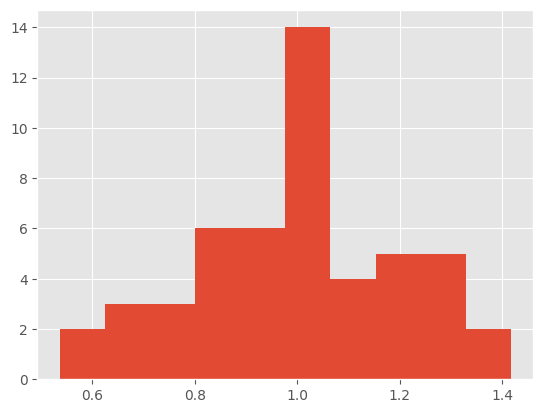

In [21]:
#sacamos 50 muestras de p_1 y 50 de p_2, con respectivamente N_1 = 30 elementos y N_2 = 40 elementos
#calculamos la diferencia entre los dos promedios para cada par de muestras y almacenamos los valores en diff
diff = np.zeros(50)
N_1 = 30
N_2 = 40
for i in range(50):
  diff[i] = np.random.choice(p_1,N_1, replace=True).mean()-np.random.choice(p_2,N_2,replace=True).mean()



plt.hist(diff)
print('La diferencia entre las medias muestrales es:',np.mean(diff))
print('La desviación estándar de la distribución muestral es:',np.std(diff,ddof=1))
print('La desviación estándar teórica de la distribución estándar es:', math.sqrt((sigma_1**2/N_1)+(sigma_2**2/N_2)))

### Intervalo de confianza para la diferencia de dos medias (poblaciones normales, $\sigma_1,\sigma_2$ conocidas)

El intervalo de confianza se calcula como:
$(\bar{x}_1-\bar{x}_2)\pm z^*\sqrt{\frac{\sigma_1^2}{N_1}+\frac{\sigma_2^2}{N_2}}$

> Bloc con sangría



Ejemplo 3

Se selecciona una muestra de $N_1$=15 compras en Amazon de un día lunes (en cierta ciudad) y una segunda muestra de $N_2$=20 compras en Amazon del sábado de la misma semana. Se quiere estimar el intervalo de confianza para la diferencia de los promedios de las dos muestras con una confianza de 95%. Se sabe, por análisis anteriores, que la desviación estándar poblacional para el lunes es $\sigma_1$=16.6 (dólares) y la desviación estándar poblacional para el sábado es $\sigma_2$=18.3 (dólares). Se supone que las poblaciones sean normales.

In [22]:
import numpy as np
import math

In [23]:
sigma1 = 16.6
sigma2 = 18.3
muestra1 = np.array([50.5174216 , 10.87516772, 41.54677899, 44.00996236, -2.07284478,
       24.37052284, 23.95653324, 22.10208968, 35.4559129 , 36.25247147,
       38.9274152 , 42.77722575, 50.53127734, 14.64715017, 67.41199723])
muestra2 = np.array([45.53317215, 39.25539436, 35.78533108, 50.06370677, 42.39238447,
       18.20733   , 18.20733   , 35.41426197, 32.5683919 , 46.7191769 ,
       30.57344459, 24.40255289, 37.37801773, 68.90981317, 41.3422348 ,
       32.95686194,  5.72793968, 55.79713306, 26.29119321, 56.43121989])
N_1 = len(muestra1)
N_2 = len(muestra2)
diff = muestra2.mean()-muestra1.mean()
st_error = math.sqrt((sigma1**2/N_1)+(sigma2**2/N_2))
confint = [diff-1.96*st_error,diff+1.96*st_error]
print(confint)
print('muestra 1:',muestra2.mean(),'muestra 2:',muestra1.mean())

[-7.837339011828414, 15.39181717316175]
muestra 1: 37.197844528 muestra 2: 33.42060544733333


### Intervalo de confianza para la diferencia de dos medias (poblaciones normales, $\sigma_1,\sigma_2$ desconocidas, muestras pequeñas)

Si no se conocen $\sigma_1$ y $\sigma_2$, se reemplazan sus valores con las desviaciones estándares muestrales. Se consideran dos casos posibles:

- Las desviaciones estándares $\sigma_1$ y $\sigma_2$ se pueden considerar iguales ($\sigma_1$=$\sigma_2$) ("POOLED").

$\bar{x}_1-\bar{x}_2\pm t^*\sqrt{\frac{(N_1-1)s_1^2+(N_2-1)s_2^2}{N_1+N_2-1}}\sqrt{\frac{1}{N_1}+\frac{1}{N_2}}$

donde el valor $t^*$ se calcula con la t-Student con número de grados de libertad:

$dof=N_1+N_2-2$

- Las desviaciones estándares $\sigma_1$ y $\sigma_2$ no son iguales (o no se sabe) (UNEQUAL)

$\bar{x}_1-\bar{x}_2\pm t^*\sqrt{\frac{s_1^2}{N_1}+\frac{s_2^2}{N_2}}$

donde el valor $t^*$ se calcula de la t-Student con número de grados de libertad dado por:

dof = $\frac{(s_1^2/N_1+s_2^2/N_2)^2}{[(s_1^2/N_1)^2/(N_1-1)+(s_2^2/N_2)^2/(N_2-1)]}$

Un valor aproximado para dof podría ser el valor mínimo entre $N_1-1$ y $N_2-1$:

$dof = min(N_1-1,N_2-1)$

Ejemplo 4

Se selecciona una muestra de $N_1$=15 compras en Amazon de un día lunes (en cierta ciudad) y una segunda muestra de $N_2$=20 compras en Amazon del sábado de la misma semana. Se quiere estimar el intervalo de confianza para la diferencia de los promedios de las dos muestras con una confianza de 95%.  Se supone que las poblaciones sean normales, pero no se conocen las desviaciones poblacionales.

In [24]:
import statsmodels.stats.api as sms

muestra1 = np.array([50.5174216 , 10.87516772, 41.54677899, 44.00996236, -2.07284478,
       24.37052284, 23.95653324, 22.10208968, 35.4559129 , 36.25247147,
       38.9274152 , 42.77722575, 50.53127734, 14.64715017, 67.41199723])
muestra2 = np.array([45.53317215, 39.25539436, 35.78533108, 50.06370677, 42.39238447,
       18.20733   , 18.20733   , 35.41426197, 32.5683919 , 46.7191769 ,
       30.57344459, 24.40255289, 37.37801773, 68.90981317, 41.3422348 ,
       32.95686194,  5.72793968, 55.79713306, 26.29119321, 56.43121989])

cm = sms.CompareMeans(sms.DescrStatsW(muestra2), sms.DescrStatsW(muestra1))
print(cm.tconfint_diff(0.05,usevar='pooled'))
print(cm.tconfint_diff(0.05,usevar='unequal'))

(-7.471778850324791, 15.026257011658126)
(-7.881358124100547, 15.435836285433883)


### Intervalo de confianza para la diferencia de dos medias ($\sigma_1,\sigma_2$ desconocidas, muestras grandes)

Valen las fórmulas anteriores, pero no es necesario controlar la normalidad de la población.

Ejemplo 5

Se selecciona una muestra de $N_1$=65 compras en Amazon de un día lunes (en cierta ciudad) y una segunda muestra de $N_2$=70 compras en Amazon del sábado de la misma semana. Se quiere estimar el intervalo de confianza para la diferencia de los promedios de las dos muestras con una confianza de 95%.  Se supone que las poblaciones sean normales, pero no se conocen las desviaciones poblacionales.

In [25]:
muestra1 = np.array([ 14.0038427 ,  12.82602737,  33.8488361 ,  11.21295   ,
        57.54927378,  25.05355704,  38.60138886,  61.36855504,
        29.88630358,  54.19826835,  13.52525457,  13.6902752 ,
        50.70529019,  30.20928685,  21.9304288 ,  39.99547279,
        41.65501317,  48.11128572,  27.52167473,  43.38287186,
        46.28789319,  54.58805263,  -2.30768944,  30.87876236,
        55.56939649,  18.68339367,  42.94944593,  73.72345079,
        16.32310077,  49.6410342 ,  34.51384399,  40.81794511,
        47.17424221,  36.09032593,  45.40236344,   4.64786619,
        20.54884663,  69.26468396,  40.6638646 ,  26.55218762,
        37.63263576,  30.00873531,  44.57432973,  33.87843602,
        65.38674876,  41.37420349,  42.02620442,  39.9401909 ,
        28.77660095,  35.05859429,  49.7283335 ,  29.50953139,
        38.69281029,  53.82089035,  43.9808393 ,  30.61029461,
        53.07155624,   0.40953773,  46.96735432,  21.92764784,
        25.90640533,  40.94217912,  22.47142755,  19.44298713,
       -10.12709208])
muestra2=np.array([ 8.77540248, 46.7961914 , 14.54060752, 57.14884215, 62.89513138,
       42.52361864, 48.40442589, 41.49936633, 61.39457724, 54.50773137,
       30.64240063, 59.72257723, 48.26813413, 24.80520775, 23.04511494,
       33.70622315, 57.99987822, 45.76687636, 51.5337471 , 22.71939168,
       37.39256836, 44.24349646, 27.90969414,  4.83015759, 16.60621264,
       42.43145758, 53.40809373, 51.7076193 , 51.72260724, 15.24978988,
       33.21545926, 15.24978988, 14.93488112, 24.40255289, 44.13479971,
       -2.92027707, 42.43145758, 42.31192569, 54.80786792, 13.98544806,
       38.10825703, 23.5258919 , 34.61421568, 59.70894129, 46.98636461,
        9.74397631, 28.6084084 , 49.00595449, 59.05349076, 35.87048774,
       -2.92027707, 33.55671909, 26.81111659, 11.07950109, 16.85421138,
       39.81181226, 26.00245656, 24.40255289, 37.02260371, 13.57113889,
       14.26873579, 44.87284578, 20.25957119, 47.20669011, 52.58139717,
       35.33145271, 20.24094683, 44.91547527, 21.25803191, 71.57598278])

In [26]:
#Con t-Student
cm = sms.CompareMeans(sms.DescrStatsW(muestra2), sms.DescrStatsW(muestra1))
print(cm.tconfint_diff(0.05,usevar='pooled'))
print(cm.tconfint_diff(0.05,usevar='unequal'))

(-6.061359447367954, 5.645175974598748)
(-6.059153067474065, 5.6429695947048595)


In [27]:
#Con z calculado con la normal
cm = sms.CompareMeans(sms.DescrStatsW(muestra2), sms.DescrStatsW(muestra1))
print(cm.zconfint_diff(0.05,usevar='pooled'))
print(cm.zconfint_diff(0.05,usevar='unequal'))

(-6.008101126522266, 5.591917653753061)
(-6.005699597218862, 5.5895161244496565)


# PRUEBA DE HIPÓTESIS

### PRUEBA DE HIPÓTESIS PARA LA MEDIA

In [28]:
import math
import scipy.stats as stats
plt.style.use('ggplot')

def plot_PH(score,N,test='ztest',alfa=0.05,option='dos colas'):
  mu = 0
  sigma = 1
  if(option=='dos colas'):
    alfa_medios = alfa/2.
    if(test=='ztest'):
      if(score > 0):
        z_c=-st.norm.ppf(alfa_medios)
      else:
        z_c=st.norm.ppf(alfa_medios)
    else:
      if(score > 0):
        z_c = -st.t(N-1).ppf(alfa/2)
      else:
        z_c = st.t(N-1).ppf(alfa/2)
    x=np.linspace(mu-3*sigma, mu+3*sigma,1000)
    iq=stats.norm(mu,sigma)

    fig = plt.figure(figsize=(6, 6))
    plt.plot(x,iq.pdf(x),'b')
    if(score > 0):
      px=np.arange(z_c,3,0.01)
      px1=np.arange(-3,-z_c,0.01)
      px2=np.arange(-z_c,z_c,0.01)
      px3=np.arange(score,3,0.01)
    else:
      px=np.arange(-3,z_c,0.01)
      px1=np.arange(-z_c,3,0.01)
      px2=np.arange(z_c,-z_c,0.01)
      px3=np.arange(-3,score,0.01)

    plt.fill_between(px, iq.pdf(px),alpha=0.8,color='red',interpolate=True )
    plt.fill_between(px1, iq.pdf(px1),alpha=0.4,color='red',interpolate=True )
    plt.fill_between(px2, iq.pdf(px2),alpha=0.4,color='green',interpolate=True)
    plt.fill_between(px3, iq.pdf(px3),alpha=0.4,color='blue',interpolate=True)
    plt.axvline(x=z_c)
    plt.axvline(x=score,color='blue')

    plt.text(z_c,0.35,'p crit=%s'%(round(z_c,2)),fontsize='large',color='red')
    plt.text(score,-0.05,'score=%s'%(round(score,2)),fontsize='large',color='blue')
    plt.text(-2.5,0.07,r'$\alpha/2$',fontsize='x-large')
    plt.text(2.1,0.07,r'$\alpha/2$',fontsize='x-large')
    #plt.text(-2.9,0.38,'significancia',fontsize='x-large')
    #plt.text(-2.4,0.35,r'$\alpha=%s$'%(alfa),fontsize='x-large')
    plt.text(-3,0.05,r'$\alpha/2=%s$'%(alfa_medios),fontsize='large',color='red')
    plt.text(2.1,0.05,r'$\alpha/2=%s$'%(alfa_medios),fontsize='large',color='red')
    plt.show()

  if(option=='una cola'):
    alfa_medios = alfa/2.
    if(test=='ztest'):
      if(score > 0):
        z_c=-st.norm.ppf(alfa)
      else:
        z_c=st.norm.ppf(alfa)
    else:
      if(score > 0):
        z_c =-st.t(N-1).ppf(alfa)
      else:
        z_c =st.t(N-1).ppf(alfa)
    x=np.linspace(mu-3*sigma, mu+3*sigma,1000)
    iq=stats.norm(mu,sigma)

    fig = plt.figure(figsize=(6, 6))
    plt.plot(x,iq.pdf(x),'b')
    if(score > 0):
      px=np.arange(z_c,3,0.01)
      px2=np.arange(-3,score,0.01)
      px3=np.arange(score,3,0.01)

    else:
      px=np.arange(-3,z_c,0.01)
      px2=np.arange(z_c,3,0.01)
      px3=np.arange(-3,score,0.01)

    plt.fill_between(px, iq.pdf(px),alpha=0.8,color='red',interpolate=True )
    #plt.fill_between(px1, iq.pdf(px1),alpha=0.4,color='green',interpolate=True )
    plt.fill_between(px2, iq.pdf(px2),alpha=0.4,color='green',interpolate=True)
    plt.fill_between(px3, iq.pdf(px3),alpha=0.4,color='blue',interpolate=True)
    plt.axvline(x=z_c)
    plt.axvline(x=score,color='blue')
    plt.text(z_c,0.35,'p crit=%s'%(round(z_c,2)),fontsize='large',color='red')
    plt.text(score,-0.05,'score=%s'%(round(score,2)),fontsize='large',color='blue')
    #plt.text(-2.5,0.07,r'$\alpha/2$',fontsize='x-large')
    plt.text(2.1,0.07,r'$\alpha$',fontsize='x-large')
    #plt.text(-2.9,0.38,'significancia',fontsize='x-large')
    #plt.text(-2.4,0.35,r'$\alpha=%s$'%(alfa),fontsize='x-large')
    #plt.text(-3,0.05,r'$\alpha/2=%s$'%(alfa_medios),fontsize='large',color='red')
    plt.text(2.1,0.05,r'$\alpha=%s$'%(alfa),fontsize='large',color='red')
    plt.show()


### Ejemplo 6: Prueba de hipótesis para la media (población normal, $\sigma$ conocida, Ejemplo 1 sobre intervalos de confianza)

Se selecciona una muestra aleatoria de N=30 pesos de paquetes enviados en Amazon cierto día. Se sabe que la población es normal con $\sigma$=3.45 kg.
El promedio muestral del peso de paquetes es $\bar{x}$=6.91 Kg. Amazon afirma que el promedio de la población (el peso promedio de los paquetes vendidos en un día) es $\mu_0$=5.63 kg.
Haga una prueba de hipótesis con significancia alfa = 0.05 y alfa = 10 de dos colas y de una cola para averiguar la afirmación de Amazon.


In [29]:
import numpy as np
import math
import scipy.stats as st
from scipy import stats
from statsmodels.stats import weightstats as stests
muestra = np.array([ 1.88689243,  8.75090936,  3.8957522 ,  3.26186619,  4.61731687,
        8.16135376,  5.65658302,  7.71257492,  7.82408157,  9.7366273 ,
        8.10762013,  7.82453888, 10.7518267 ,  2.77780904, 11.21601643,
       11.96064261,  6.14154209,  4.99190303,  3.93209336,  6.53560598,
        7.98872059,  9.64968492,  7.27697272, 12.27795519,  3.81474239,
        8.99003868,  2.66776263,  4.43998498,  4.012761  , 10.44755954])
print(muestra.mean())
mu0 = 5.63
sigma = 3.35
N=30
alfa = 0.05
z = (muestra.mean()-5.63)/(sigma/math.sqrt(N))
p_value = 1-st.norm.cdf(z)
print('p-value=',p_value,'z=',z)
#Test de dos colas
print('####TEST DE DOS COLAS - alfa=0.05')
print('z crítico=',-st.norm.ppf(alfa/2))

if(p_value >= alfa/2):
  print('No hay evidencia para rechazar H0 con test de dos colas y alfa=0.05')
else:
  print('Hay evidencia para rechazar H0 con test de dos colas y alfa=0.05')

print('El intervalo de confianza de 95% (Ejercicio 1) es: [5.67578066 8.14486858]')
print('El intervalo no captura mu0=5.63, se rechaza H0')

print('####TEST DE UNA COLA - alfa=0.05')
print('z crítico=',-st.norm.ppf(alfa))

if(p_value >= alfa):
  print('No hay evidencia para rechazar H0 con test de una y alfa=0.05')
else:
  print('Hay evidencia para rechazar H0 con test de una colas y alfa=0.05')


#ztest ,pval = stests.ztest(muestra, x2=None, value=5.63)
#print(pval)

6.910324617
p-value= 0.018160236166287258 z= 2.0933214139106333
####TEST DE DOS COLAS - alfa=0.05
z crítico= 1.9599639845400545
Hay evidencia para rechazar H0 con test de dos colas y alfa=0.05
El intervalo de confianza de 95% (Ejercicio 1) es: [5.67578066 8.14486858]
El intervalo no captura mu0=5.63, se rechaza H0
####TEST DE UNA COLA - alfa=0.05
z crítico= 1.6448536269514729
Hay evidencia para rechazar H0 con test de una colas y alfa=0.05


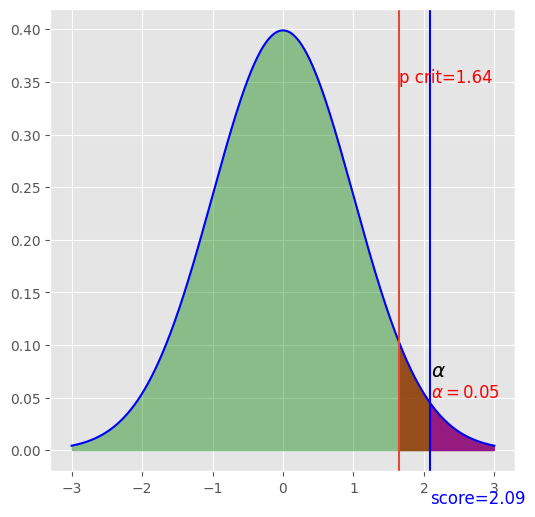

In [30]:
plot_PH(z,N,'ztest',0.05,'una cola')

In [31]:
print('#### TEST DE DOS COLAS - alfa=0.10')
alfa = 0.10
print('z crítico=',-st.norm.ppf(alfa/2))

if(p_value >= alfa/2):
  print('No hay evidencia para rechazar H0 con test de dos colas y alfa=0.05')
else:
  print('Hay evidencia para rechazar H0 con test de dos colas y alfa=0.05')

print('Intervalo de confianza de 90% (Ejercicio 1):[5.8742626664331645, 7.946386567566835]')

print('####TEST DE UNA COLA - alfa=0.10')
print('z crítico=',-st.norm.ppf(alfa))

if(p_value >= alfa):
  print('No hay evidencia para rechazar H0 con test de una y alfa=0.05')
else:
  print('Hay evidencia para rechazar H0 con test de una colas y alfa=0.05')



#### TEST DE DOS COLAS - alfa=0.10
z crítico= 1.6448536269514729
Hay evidencia para rechazar H0 con test de dos colas y alfa=0.05
Intervalo de confianza de 90% (Ejercicio 1):[5.8742626664331645, 7.946386567566835]
####TEST DE UNA COLA - alfa=0.10
z crítico= 1.2815515655446004
Hay evidencia para rechazar H0 con test de una colas y alfa=0.05


In [32]:
print('#### TEST DE DOS COLAS - alfa=0.01')
alfa = 0.01
print('p-value=',p_value,'z=',z)

print('z crítico=',-st.norm.ppf(alfa/2))
if(p_value >= alfa/2):
  print('No hay evidencia para rechazar H0 con test de dos colas y alfa=0.05')
else:
  print('Hay evidencia para rechazar H0 con test de dos colas y alfa=0.05')


print('####TEST DE UNA COLA - alfa=0.01')
print('z crítico=',-st.norm.ppf(alfa))

if(p_value >= alfa):
  print('No hay evidencia para rechazar H0 con test de una y alfa=0.05')
else:
  print('Hay evidencia para rechazar H0 con test de una colas y alfa=0.05')


#### TEST DE DOS COLAS - alfa=0.01
p-value= 0.018160236166287258 z= 2.0933214139106333
z crítico= 2.575829303548901
No hay evidencia para rechazar H0 con test de dos colas y alfa=0.05
####TEST DE UNA COLA - alfa=0.01
z crítico= 2.3263478740408408
No hay evidencia para rechazar H0 con test de una y alfa=0.05


## Ejemplo 7: población normal, $\sigma$ desconocida, muestra pequeña
Se quiere estimar el precio promedio de las compras en Amazon cierto día en cierta ciudad. Se selecciona una muestra aleatoria de N = 20 compras y se encuentra un promedio muestral de 34.72 dólares.  Amazon afirma que el promedio poblacional de compras por día es $\mu_0$=37.8 dólares.
Haga una prueba de hipótesis con significancia alfa = 0.05 y alfa = 0.10 de dos colas y de una cola para averiguar la afirmación de Amazon.

In [33]:
muestra_2 = np.array([40.32334114, 49.66441589, 48.81963426, 31.93328783, 42.84719922,
       23.73574529, 34.22486951, 42.27710215, 22.8967719 , 38.65320427,
       36.64494369, 31.0026404 , 22.50213678, 30.62881846, 24.7274558 ,
       24.31204024, 23.97677856, 44.409053  , 53.53516598, 27.39778207])

print('Media muestral=',muestra_2.mean())
print('El intervalo de confianza 95% es (t-Student 19 grados de libertad):')
import statsmodels.stats.api as sms
print(sms.DescrStatsW(muestra_2).tconfint_mean(0.05))

Media muestral= 34.72561932199999
El intervalo de confianza 95% es (t-Student 19 grados de libertad):
(30.08350023857713, 39.367738405422855)


Dado que el intervalo de confianza captura $\mu_0$, nos esperamos que no haya evidencia para rechazar la hipótesis nula.

|Hipótesis| Prueba de dos colas| Prueba de una cola |
|---|--------------|-------------------|
|$H_0$:|$\mu=\mu_0 = 37.8$|$\mu_0 >= 37.8$|
|$H_1$:|$\mu \ne\mu_0 = 37.8$|$\mu_0 < 37.8$|






In [35]:
import math
desv_est_muestra = muestra_2.std(ddof=1)
media_muestra = muestra_2.mean()
N=len(muestra_2)
t = (media_muestra-37.8)/(desv_est_muestra/math.sqrt(N))
print('t-score =',t)
p_value = st.t(N-1).cdf(t)
print('P value=',p_value)

t-score = -1.3861670921887113
P value= 0.0908747942819443


In [36]:
print('####TEST DE DOS COLAS - alfa=0.05')
alfa = 0.05
print('t crítico=',st.t(N-1).ppf(alfa/2))

if(p_value >= alfa/2):
  print('No hay evidencia para rechazar H0 con test de dos colas y alfa=0.05')
else:
  print('Hay evidencia para rechazar H0 con test de dos colas y alfa=0.05')


print('####TEST DE UNA COLA - alfa=0.05')
print('t crítico=',st.t(N-1).ppf(alfa))

if(p_value >= alfa):
  print('No hay evidencia para rechazar H0 con test de una y alfa=0.05')
else:
  print('Hay evidencia para rechazar H0 con test de una colas y alfa=0.05')

print('####TEST DE DOS COLAS - alfa=0.10')
alfa = 0.10
print('t crítico=',st.t(N-1).ppf(alfa/2))

if(p_value >= alfa/2):
  print('No hay evidencia para rechazar H0 con test de dos colas y alfa=0.10')
else:
  print('Hay evidencia para rechazar H0 con test de dos colas y alfa=0.10')


print('####TEST DE UNA COLA - alfa=0.10')
print('t crítico=',st.t(N-1).ppf(alfa))

if(p_value >= alfa):
  print('No hay evidencia para rechazar H0 con test de una y alfa=0.10')
else:
  print('Hay evidencia para rechazar H0 con test de una colas y alfa=0.10')



####TEST DE DOS COLAS - alfa=0.05
t crítico= -2.0930240544082634
No hay evidencia para rechazar H0 con test de dos colas y alfa=0.05
####TEST DE UNA COLA - alfa=0.05
t crítico= -1.7291328115213678
No hay evidencia para rechazar H0 con test de una y alfa=0.05
####TEST DE DOS COLAS - alfa=0.10
t crítico= -1.7291328115213678
No hay evidencia para rechazar H0 con test de dos colas y alfa=0.10
####TEST DE UNA COLA - alfa=0.10
t crítico= -1.3277282090267981
Hay evidencia para rechazar H0 con test de una colas y alfa=0.10


In [ ]:
plot_PH(t,N,'ttest',0.20,'dos colas')

In [ ]:
plot_PH(t,N,'ttest',0.05,'una cola')

In [ ]:
import statsmodels.stats.api as sms
tstat, pvalue, dof = sms.DescrStatsW(muestra_2).ttest_mean(37.8,'two-sided')
print('P value =',pvalue,'tscore=',tstat)

El p-value es el doble porque se suman las dos colas, se compara al valor de alfa y no de alfa medios.

In [ ]:
import statsmodels.stats.api as sms
tstat, pvalue, dof = sms.DescrStatsW(muestra_2).ttest_mean(37.8,'smaller')
print('P value =',pvalue,'tscore=',tstat)

### Prueba de hipótesis para la diferencia entre dos medias

Se hace para averiguar si la diferencia entre dos promedios muestrales es significativamente diferente que 0 o no (si lo es se puede pensar que las dos muestran pertenezcan a la misma población).

https://www.reneshbedre.com/blog/ttest.html



|Hipótesis| Prueba de dos colas| Prueba de una cola |
|---|--------------|-------------------|
|$H_0$:|$\mu_1-\mu_2 = 0$|$\mu_1-\mu_2 >= 0$|
|$H_1$:|$\mu_1-\mu_2 \ne 0$|$\mu_1-\mu_2 < 0$|

La población debe ser normal  o la muestra debe ser grande ( N>30).
Valen los mismos resultados vistos para los intervalos de confianza.
Para hacer las pruebas de dos colas se pueden calcular los intervalos de confianza para la diferencia de las medias y si los intervalos contienen el valor cero no hay evidencias para rechazar $H_0$ (la diferencia no es significativa).

En el caso (casi siempre) de que no se conozcan las desviaciones de las poblaciones $\sigma_1$ y $\sigma_2$, se usa la distribución t-Student y hay varios tipos de pruebas:

- Muestras dependientes (por ejemplo dos mediciones sobre los mismos elementos a distancia de tiempo) **No la veremos

-Muestras independientes 'pooled' si se supone que las varianzas de las poblaciones son iguales

-Muestras independientes 'unequal' si se supone que las varianzas de las poblaciones no son iguales.



In [ ]:
## FUNCIÓN PARA VISUALIZAR EL RESULTADO DE LA PRUEBA DE HIPÓTESIS

import math
import scipy.stats as stats
plt.style.use('ggplot')

def plot_PH(score,N,test='ztest',alfa=0.05,option='dos colas'):
  mu = 0
  sigma = 1
  if(option=='dos colas'):
    alfa_medios = alfa/2.
    if(test=='ztest'):
      if(score > 0):
        z_c=-st.norm.ppf(alfa_medios)
      else:
        z_c=st.norm.ppf(alfa_medios)
    else:
      if(score > 0):
        z_c = -st.t(N-1).ppf(alfa/2)
      else:
        z_c = st.t(N-1).ppf(alfa/2)
    x=np.linspace(mu-3*sigma, mu+3*sigma,1000)
    iq=stats.norm(mu,sigma)

    fig = plt.figure(figsize=(6, 6))
    plt.plot(x,iq.pdf(x),'b')
    if(score > 0):
      px=np.arange(z_c,3,0.01)
      px1=np.arange(-3,-z_c,0.01)
      px2=np.arange(-z_c,z_c,0.01)
      px3=np.arange(score,3,0.01)
    else:
      px=np.arange(-3,z_c,0.01)
      px1=np.arange(-z_c,3,0.01)
      px2=np.arange(z_c,-z_c,0.01)
      px3=np.arange(-3,score,0.01)

    plt.fill_between(px, iq.pdf(px),alpha=0.8,color='red',interpolate=True )
    plt.fill_between(px1, iq.pdf(px1),alpha=0.4,color='red',interpolate=True )
    plt.fill_between(px2, iq.pdf(px2),alpha=0.4,color='green',interpolate=True)
    plt.fill_between(px3, iq.pdf(px3),alpha=0.4,color='blue',interpolate=True)
    plt.axvline(x=z_c)
    plt.axvline(x=score,color='blue')

    plt.text(z_c,0.35,'p crit=%s'%(round(z_c,2)),fontsize='large',color='red')
    plt.text(score,-0.05,'score=%s'%(round(score,2)),fontsize='large',color='blue')
    plt.text(-2.5,0.07,r'$\alpha/2$',fontsize='x-large')
    plt.text(2.1,0.07,r'$\alpha/2$',fontsize='x-large')
    #plt.text(-2.9,0.38,'significancia',fontsize='x-large')
    #plt.text(-2.4,0.35,r'$\alpha=%s$'%(alfa),fontsize='x-large')
    plt.text(-3,0.05,r'$\alpha/2=%s$'%(alfa_medios),fontsize='large',color='red')
    plt.text(2.1,0.05,r'$\alpha/2=%s$'%(alfa_medios),fontsize='large',color='red')
    plt.show()

  if(option=='una cola'):
    alfa_medios = alfa/2.
    if(test=='ztest'):
      if(score > 0):
        z_c=-st.norm.ppf(alfa)
      else:
        z_c=st.norm.ppf(alfa)
    else:
      if(score > 0):
        z_c =-st.t(N-1).ppf(alfa)
      else:
        z_c =st.t(N-1).ppf(alfa)
    x=np.linspace(mu-3*sigma, mu+3*sigma,1000)
    iq=stats.norm(mu,sigma)

    fig = plt.figure(figsize=(6, 6))
    plt.plot(x,iq.pdf(x),'b')
    if(score > 0):
      px=np.arange(z_c,3,0.01)
      px2=np.arange(-3,score,0.01)
      px3=np.arange(score,3,0.01)

    else:
      px=np.arange(-3,z_c,0.01)
      px2=np.arange(z_c,3,0.01)
      px3=np.arange(-3,score,0.01)

    plt.fill_between(px, iq.pdf(px),alpha=0.8,color='red',interpolate=True )
    #plt.fill_between(px1, iq.pdf(px1),alpha=0.4,color='green',interpolate=True )
    plt.fill_between(px2, iq.pdf(px2),alpha=0.4,color='green',interpolate=True)
    plt.fill_between(px3, iq.pdf(px3),alpha=0.4,color='blue',interpolate=True)
    plt.axvline(x=z_c)
    plt.axvline(x=score,color='blue')
    plt.text(z_c,0.35,'p crit=%s'%(round(z_c,2)),fontsize='large',color='red')
    plt.text(score,-0.05,'score=%s'%(round(score,2)),fontsize='large',color='blue')
    #plt.text(-2.5,0.07,r'$\alpha/2$',fontsize='x-large')
    plt.text(2.1,0.07,r'$\alpha$',fontsize='x-large')
    #plt.text(-2.9,0.38,'significancia',fontsize='x-large')
    #plt.text(-2.4,0.35,r'$\alpha=%s$'%(alfa),fontsize='x-large')
    #plt.text(-3,0.05,r'$\alpha/2=%s$'%(alfa_medios),fontsize='large',color='red')
    plt.text(2.1,0.05,r'$\alpha=%s$'%(alfa),fontsize='large',color='red')
    plt.show()


In [ ]:
from scipy import stats as st
import statsmodels.stats.api as sms


In [ ]:
muestraA = np.random.normal(3.5,0.3,25)
muestraB = np.random.normal(3.5,0.3,32)


In [ ]:
N1 = 25
N2 = 32
muestraA

In [ ]:
muestraB

In [ ]:
media1 = muestraA.mean()
media2 = muestraB.mean()
print(media1,media2)

In [ ]:
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(muestraA), sms.DescrStatsW(muestraB))
score, pvalue, dof = cm.ttest_ind(alternative='two-sided',usevar='unequal')
print('pvalue=',pvalue)
print('dof=',dof)

In [ ]:
plot_PH(score,dof,test='ttest',alfa=0.05,option='dos colas')